***Introduction to Time Series Analysis in Python***

https://www.datacamp.com/courses/introduction-to-time-series-analysis-in-python?utm_campaign=broadcast&utm_medium=broadcast_12&utm_source=main

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
diet = pd.read_csv('/Users/egortarasenok/Market_data/20170918_Shfe-shifco-md.csv', sep =',')
diet = diet[['receive_time', 'ask_price']]
diet['time_h'] = pd.to_datetime(diet['receive_time'], unit= 'ns')

In [35]:
diet.set_index('time_h', inplace = True)

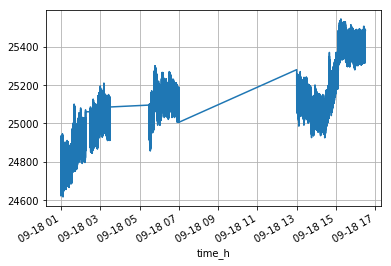

In [43]:
diet['ask_price'].plot(grid=True)
plt.show()

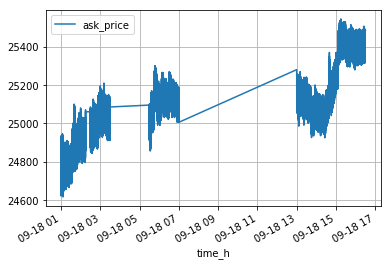

In [44]:
diet[['ask_price']].plot(grid=True)

In [46]:
df_temp = pd.read_csv('/Users/egortarasenok/Market_data/20170918_Shfe-shifco-md.csv', sep =',')
#stock = diet = diet[['receive_time', 'ask_price']]

In [48]:
df_temp.instrument_id.unique()

array(['zn1711', 'zn1712'], dtype=object)

In [57]:
bond = df_temp[df_temp.instrument_id == 'zn1711'][['receive_time', 'ask_price']]
stock = df_temp[df_temp.instrument_id == 'zn1712'][['receive_time', 'bid_price']]

bond.set_index('receive_time', inplace = True)
stock.set_index('receive_time', inplace = True)

In [58]:
stock_and_bonds = bond.join(stock, how = 'inner')

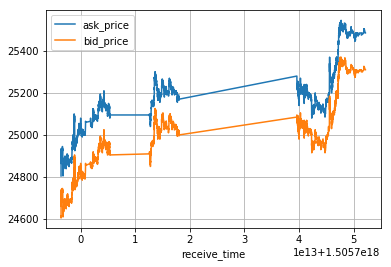

In [61]:
stock_and_bonds.plot(grid = True)
plt.show()

In [66]:
bond = df_temp[df_temp.instrument_id == 'zn1711'][['receive_time']]
stock = df_temp[df_temp.instrument_id == 'zn1712'][['receive_time']]

In [70]:
set(bond['receive_time'])  - set(stock['receive_time']) 

{1505700717192806400,
 1505746398154752000,
 1505696448114688000,
 1505704529778278400,
 1505748249227165700,
 1505744180075626500,
 1505747030170730500,
 1505741531983872000,
 1505740531965755400,
 1505698207134318600,
 1505749745264033800,
 1505750600303214600,
 1505701979738636300,
 1505702143234572300,
 1505741022984306700,
 1505702493735026700,
 1505700359222493200,
 1505713076500496400,
 1505739948934365200,
 1505700797198860300,
 1505745832141127700,
 1505715662564884500,
 1505742319033057300,
 1505749085749575700,
 1505716041064677400,
 1505698548146405400,
 1505746482153291800,
 1505742906036551700,
 1505697700633116700,
 1505751391316508700,
 1505743948068585500,
 1505749493744566300,
 1505750060780781600,
 1505702046234247200,
 1505717749102215200,
 1505751114302292000,
 1505747639689150500,
 1505749954276491300,
 1505714934535716900,
 1505745691638923300,
 1505743129055068200,
 1505751433832693800,
 1505741978512425000,
 1505747991198859300,
 1505741878021881900,
 150571628

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2710 entries, 2008-01-02 to 2018-04-04
Data columns (total 2 columns):
BAMLHYH0A0HYM2TRIV    2678 non-null float64
SP500                 2518 non-null float64
dtypes: float64(2)
memory usage: 63.5 KB


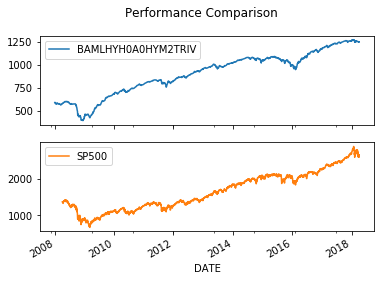

In [105]:
start = date(2008,1,1)
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']
data = DataReader(series,'fred', start = start)
data.info()
data.plot(subplots= True, title = 'Performance Comparison')
plt.show()

In [84]:
data['SP500_d'] = data['SP500'].diff()
data['SP500_pch'] = data['SP500'].pct_change()

data['B_d'] = data['BAMLHYH0A0HYM2TRIV'].diff()
data['B_pch'] = data['BAMLHYH0A0HYM2TRIV'].pct_change()


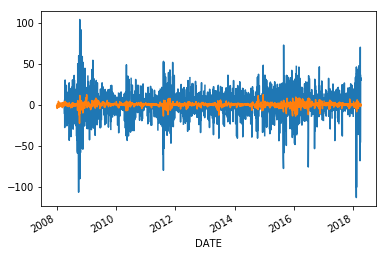

In [90]:
data.SP500_d.plot()
data.B_d.plot()
plt.show()

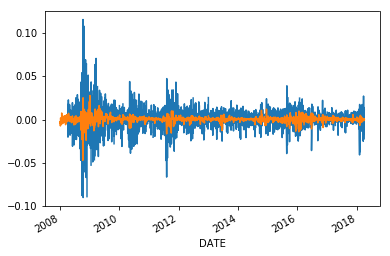

In [89]:
data.SP500_pch.plot()
data.B_pch.plot()
plt.show()

In [103]:
data[['SP500_pch','B_pch']].corr().round(2)

SP500_pch  B_pch
SP500_pch        1.0    0.3
B_pch            0.3    1.0

In [102]:
data[['SP500_d','B_d']].corr().round(2)

SP500_d   B_d
SP500_d     1.00  0.36
B_d         0.36  1.00

In [104]:
data[['SP500','BAMLHYH0A0HYM2TRIV']].corr().round(2)

SP500  BAMLHYH0A0HYM2TRIV
SP500                1.00                0.94
BAMLHYH0A0HYM2TRIV   0.94                1.00

In [96]:
def _color_red_or_green(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

The positive correlation means that when interest go down, stock prices go down. For example, during crises like 9/11, investors sold stocks and moved their money to less risky bonds (this is sometimes referred to as a 'flight to quality'). During these periods, stocks drop and interest rates drop as well. Of course, there are times when the opposite relationship holds too

0.3044213691535097


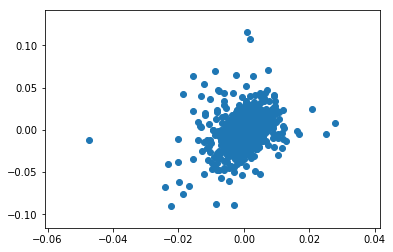

In [120]:
returns = data.pct_change()
print(returns['BAMLHYH0A0HYM2TRIV'].corr(returns['SP500']))
plt.scatter(returns['BAMLHYH0A0HYM2TRIV'],returns['SP500'])

In [136]:
UFO = pd.read_csv('/Users/egortarasenok/learning_path/datacamp/UFO.csv', sep = ',')
DJI = pd.read_csv('/Users/egortarasenok/learning_path/datacamp/data/DJI.csv', sep = ',')

In [142]:
UFO.columns = ['Date','UFO']
DJI.columns = ['Date','DJI']
UFO.set_index('Date', inplace = True)
DJI.set_index('Date', inplace = True)

In [144]:
U_D = DJI.join(UFO, how= 'inner')

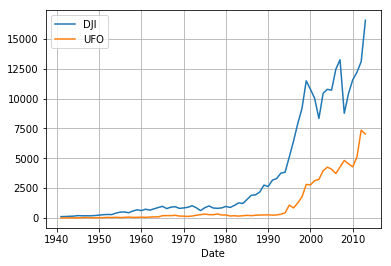

In [145]:
U_D.plot(grid = True)

In [147]:
U_D.corr()

DJI       UFO
DJI  1.000000  0.939976
UFO  0.939976  1.000000

0.07827752895422371


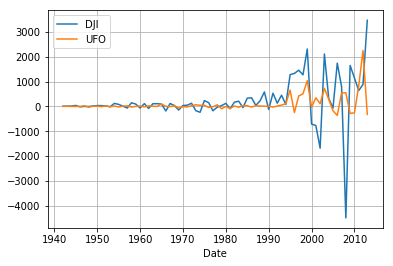

In [153]:
U_D_diff = U_D.diff()
print(U_D_diff['DJI'].corr(U_D_diff['UFO']))
U_D_diff.plot(grid = True)
plt.show()

0.060269354624053736


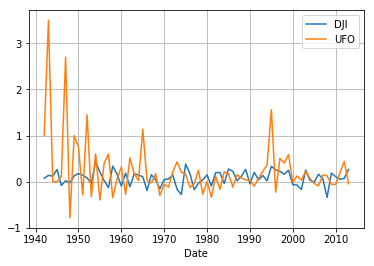

In [154]:
U_D_pch = U_D.pct_change()
print(U_D_pch['DJI'].corr(U_D_pch['UFO']))
U_D_pch.plot(grid = True)
plt.show()

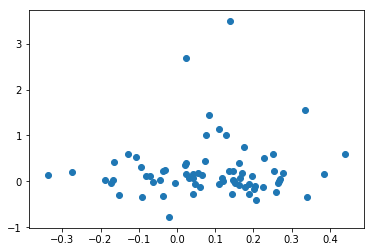

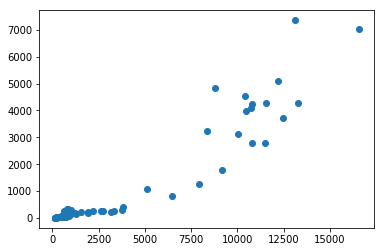

In [158]:
plt.scatter(U_D_pch['DJI'], U_D_pch['UFO'])
plt.show()
plt.scatter(U_D['DJI'], U_D['UFO'])
plt.show()

***Looking at a Regression's R-Squared***

R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package statsmodels, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

You will take two series, x and y, compute their correlation, and then regress y on x using the function OLS() in the statsmodels.api library. Most linear regressions contain a constant term which is the intercept (the α in the regression yt=α+βxt+ϵt). To include a constant using the function OLS(), you need to add a column of 1's to the right hand side of the regression.


In [160]:
from pandas.core import datetools as sm

In [161]:
from sklearn import datasets

In [162]:
data = datasets.load_boston()

KeyError: 1

In [167]:
df_temp.instrument_id.unique()

array(['zn1711', 'zn1712'], dtype=object)

In [235]:
df_temp[:2]

Unnamed: 0  ask_price  ask_volume  bid_price  bid_volume      date  \
0          29    24805.0         2.0    24770.0         3.0  20170918   
1          30    24630.0        17.0    24615.0         1.0  20170918   

  instrument_id         receive_time     turnover  update_millisec  \
0        zn1711  1505696401620860400  27568730550              500   
1        zn1712  1505696401620860400   7702488950              500   

  update_time  volume  
0    09:00:00  223900  
1    09:00:00   62996

In [169]:
df_temp[df_temp.instrument_id == "zn1711"][['bid_price','ask_price']].corr()

bid_price  ask_price
bid_price    1.00000    0.99993
ask_price    0.99993    1.00000

In [170]:
df_temp[df_temp.instrument_id == "zn1712"][['bid_price','ask_price']].corr()

bid_price  ask_price
bid_price   1.000000   0.999865
ask_price   0.999865   1.000000

In [173]:
zn1712 = df_temp[df_temp.instrument_id == "zn1712"][['ask_price','bid_price','receive_time']]
zn1711 = df_temp[df_temp.instrument_id == "zn1711"][['ask_price','bid_price','receive_time']]

In [176]:
zn1712[:2]

ask_price  bid_price         receive_time
1    24630.0    24615.0  1505696401620860400
3    24625.0    24590.0  1505696402111495400

In [177]:
zn1711[:2]

ask_price  bid_price         receive_time
0    24805.0    24770.0  1505696401620860400
2    24800.0    24790.0  1505696402111482000

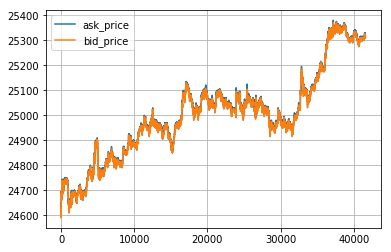

In [200]:
zn1712[['ask_price','bid_price']].plot(grid = True)

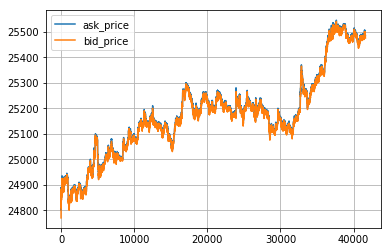

In [201]:
zn1711[['ask_price','bid_price']].plot(grid = True)

In [388]:
def shift_corr(df,instrument_id1,instrument_id2):
    
    df_1 = df[df.instrument_id == instrument_id1][['ask_price','bid_price','receive_time']]
    df_2 = df[df.instrument_id == instrument_id2][['ask_price','bid_price','receive_time']] 

    df_2["ask_price"] = df_2["ask_price"].shift(-1)
    df_2["bid_price"] = df_2["bid_price"].shift(-1)

    df_3 = pd.merge(df_1,df_2, how='outer', on = ['receive_time'])
    df_3.sort_values(by = 'receive_time', inplace = True)
    
    df_3.fillna(method='ffill', inplace = True)
    df_3.reset_index(drop = True, inplace = True)
    
    df_3_pct = df_3.pct_change()
    df_3_pct.dropna(inplace = True)
    
    print(df_3_pct['ask_price_x'].corr(df_3_pct['ask_price_y']))
    print(df_3_pct['bid_price_x'].corr(df_3_pct['bid_price_y']))
    
    fig = plt.figure()
    ax = plt.subplot()
    df_3_pct.plot(x='ask_price_x', y = 'ask_price_y', ax=ax, kind='scatter')
    ax.set_xlim(df_3_pct['ask_price_x'].min(),df_3_pct['ask_price_x'].max())
    ax.set_ylim(df_3_pct['ask_price_y'].min(),df_3_pct['ask_price_y'].max())
    plt.show()
    
    ax = plt.subplot()
    df_3_pct.plot(x='bid_price_x', y = 'bid_price_y', ax=ax, kind='scatter')
    ax.set_xlim(df_3_pct['bid_price_x'].min(),df_3_pct['bid_price_x'].max())
    ax.set_ylim(df_3_pct['bid_price_y'].min(),df_3_pct['bid_price_y'].max())
    plt.show()

    return 

-0.00781935671941326
-0.0031616776697538027


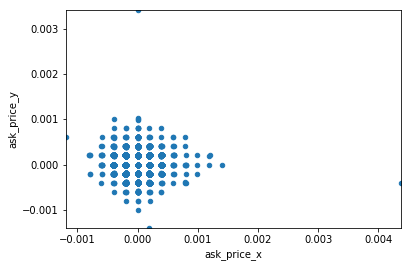

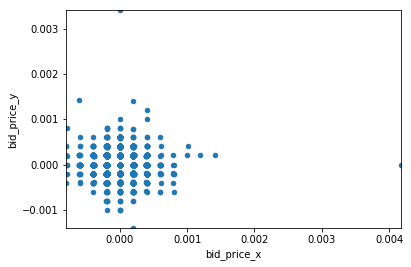

In [389]:
df_temp = pd.read_csv('/Users/egortarasenok/Market_data/20170918_Shfe-shifco-md.csv', sep =',')

shift_corr(df_temp, "zn1711","zn1712")

['hc1901' 'ni1805' 'ni1806' 'ni1807' 'ni1809' 'ni1810' 'ni1901' 'ni1902'
 'ni1903' 'pb1806' 'pb1810' 'pb1811' 'pb1902' 'pb1903' 'rb1805' 'ni1812'
 'rb1810' 'rb1812' 'ru1805' 'ru1809' 'ru1810' 'ru1903' 'sn1901' 'zn1804'
 'zn1805' 'zn1806' 'zn1807' 'zn1808' 'zn1809' 'zn1811' 'rb1902' 'zn1810'
 'zn1812' 'ag1804' 'ag1805' 'ag1806' 'al1804' 'al1806' 'al1807' 'al1808'
 'al1812' 'al1901' 'au1804' 'au1805' 'au1806' 'au1904' 'au1902' 'al1805'
 'bu1805' 'bu1806' 'bu1809' 'bu1812' 'cu1804' 'cu1805' 'cu1806' 'cu1807'
 'cu1808' 'cu1809' 'cu1810' 'cu1811' 'cu1812' 'cu1902' 'cu1903' 'hc1810'
 'ni1811' 'pb1805' 'rb1806' 'zn1901' 'zn1903' 'ag1807' 'ag1810' 'ag1901'
 'ag1902' 'ag1812' 'al1809' 'al1810' 'al1811' 'au1808' 'hc1805' 'hc1809'
 'rb1809' 'rb1811' 'rb1901' 'ru1806' 'pb1812' 'zn1902' 'ag1809' 'sn1809'
 'pb1804' 'au1812' 'cu1901' 'pb1901' 'rb1903' 'bu2003' 'bu1909' 'ni1808'
 'rb1807' 'ru1808' 'al1903' 'ru1901' 'sn1805' 'hc1806' 'pb1807' 'ru1811'
 'pb1808' 'bu1903' 'bu1906' 'bu1912' 'ru1807' 'hc18

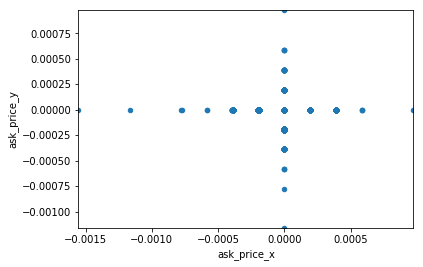

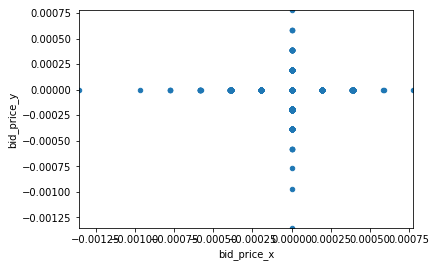

In [398]:
df_temp = pd.read_csv('/Users/egortarasenok/Market_data/20180319.json.csv', sep =';')

df_temp = df_temp[['Message.update_time_field.instrument_id'
                   ,'Message.best_price_field.ask_price1'
                   ,'Message.best_price_field.bid_price1'
                  ,"Header.Timestamp"]]

df_temp.columns = ['instrument_id','ask_price','bid_price','receive_time']

print(df_temp['instrument_id'].unique())

shift_corr(df_temp, "cu1804","cu1805")

In [373]:
for i1 in df_temp['instrument_id'].unique():
    for i2 in df_temp['instrument_id'].unique():
        print(i1,i2)
        shift_corr(df_temp, i1,i2)

hc1901 hc1901


TypeError: unsupported operand type(s) for /: 'str' and 'str'